In [105]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler

In [107]:
X_train = pd.read_csv('/Users/nattasorn/Documents/dads_6003/Group_quiz 1/dads-6003-firewall-ml/data_source/X_train.csv')
y_train = pd.read_csv('/Users/nattasorn/Documents/dads_6003/Group_quiz 1/dads-6003-firewall-ml/data_source/y_train.csv')

X_test = pd.read_csv('/Users/nattasorn/Documents/dads_6003/Group_quiz 1/dads-6003-firewall-ml/data_source/X_test.csv')
y_test = pd.read_csv('/Users/nattasorn/Documents/dads_6003/Group_quiz 1/dads-6003-firewall-ml/data_source/y_test.csv')

In [108]:
y_train.value_counts()

Action
2         26245
0         25830
3         25744
1         25165
dtype: int64

In [109]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)


/var/folders/lb/l9wnsg5s0sn3lz8_2x35d8w80000gn/T/ipykernel_82829/3665448564.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [110]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9954730417090539


In [111]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)

# deny drop wrongly prodicted

array([[11279,    13,     0,     0],
       [    3,  4428,    10,    55],
       [    0,     0,  3856,     0],
       [    0,     8,     0,     8]])

In [119]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11292
           1       1.00      0.98      0.99      4496
           2       1.00      1.00      1.00      3856
           3       0.13      0.50      0.20        16

    accuracy                           1.00     19660
   macro avg       0.78      0.87      0.80     19660
weighted avg       1.00      1.00      1.00     19660



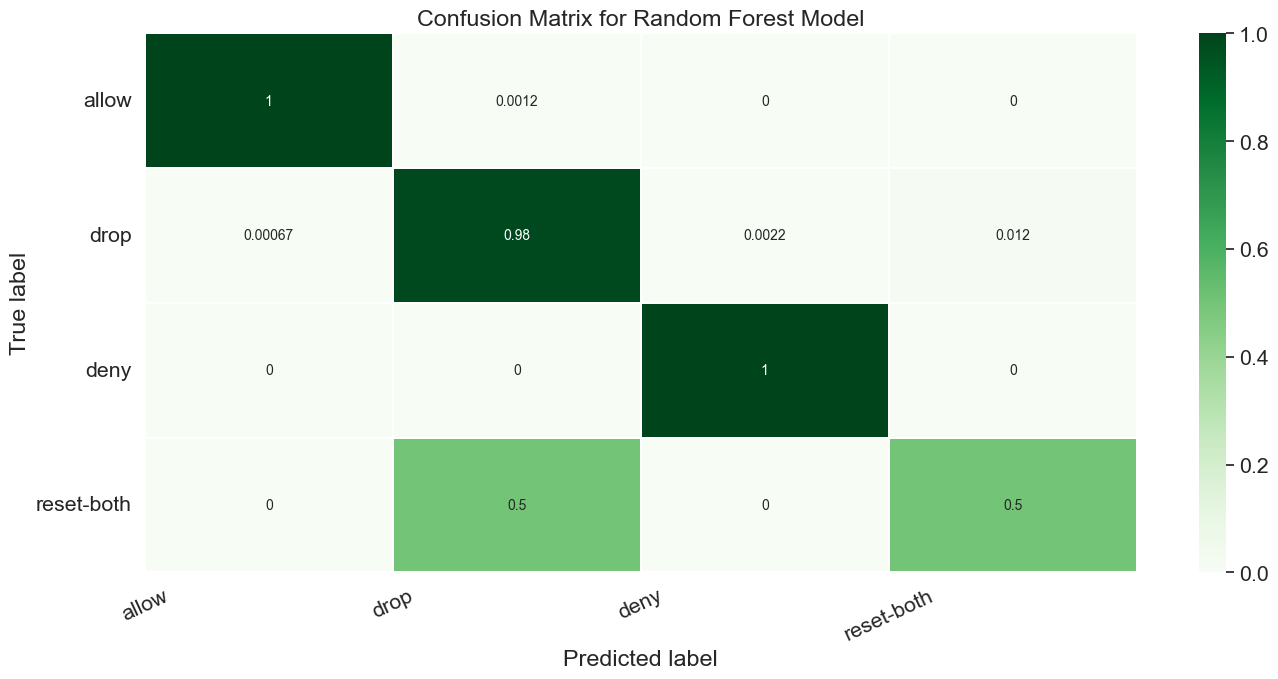

In [112]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['allow','drop','deny','reset-both']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# About 75% of the time, reset-both were mislabeled as drop!

In [114]:
!pip install pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.metrics import classification_report, confusion_matrix  


[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [115]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Breast Cancer Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=1000,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

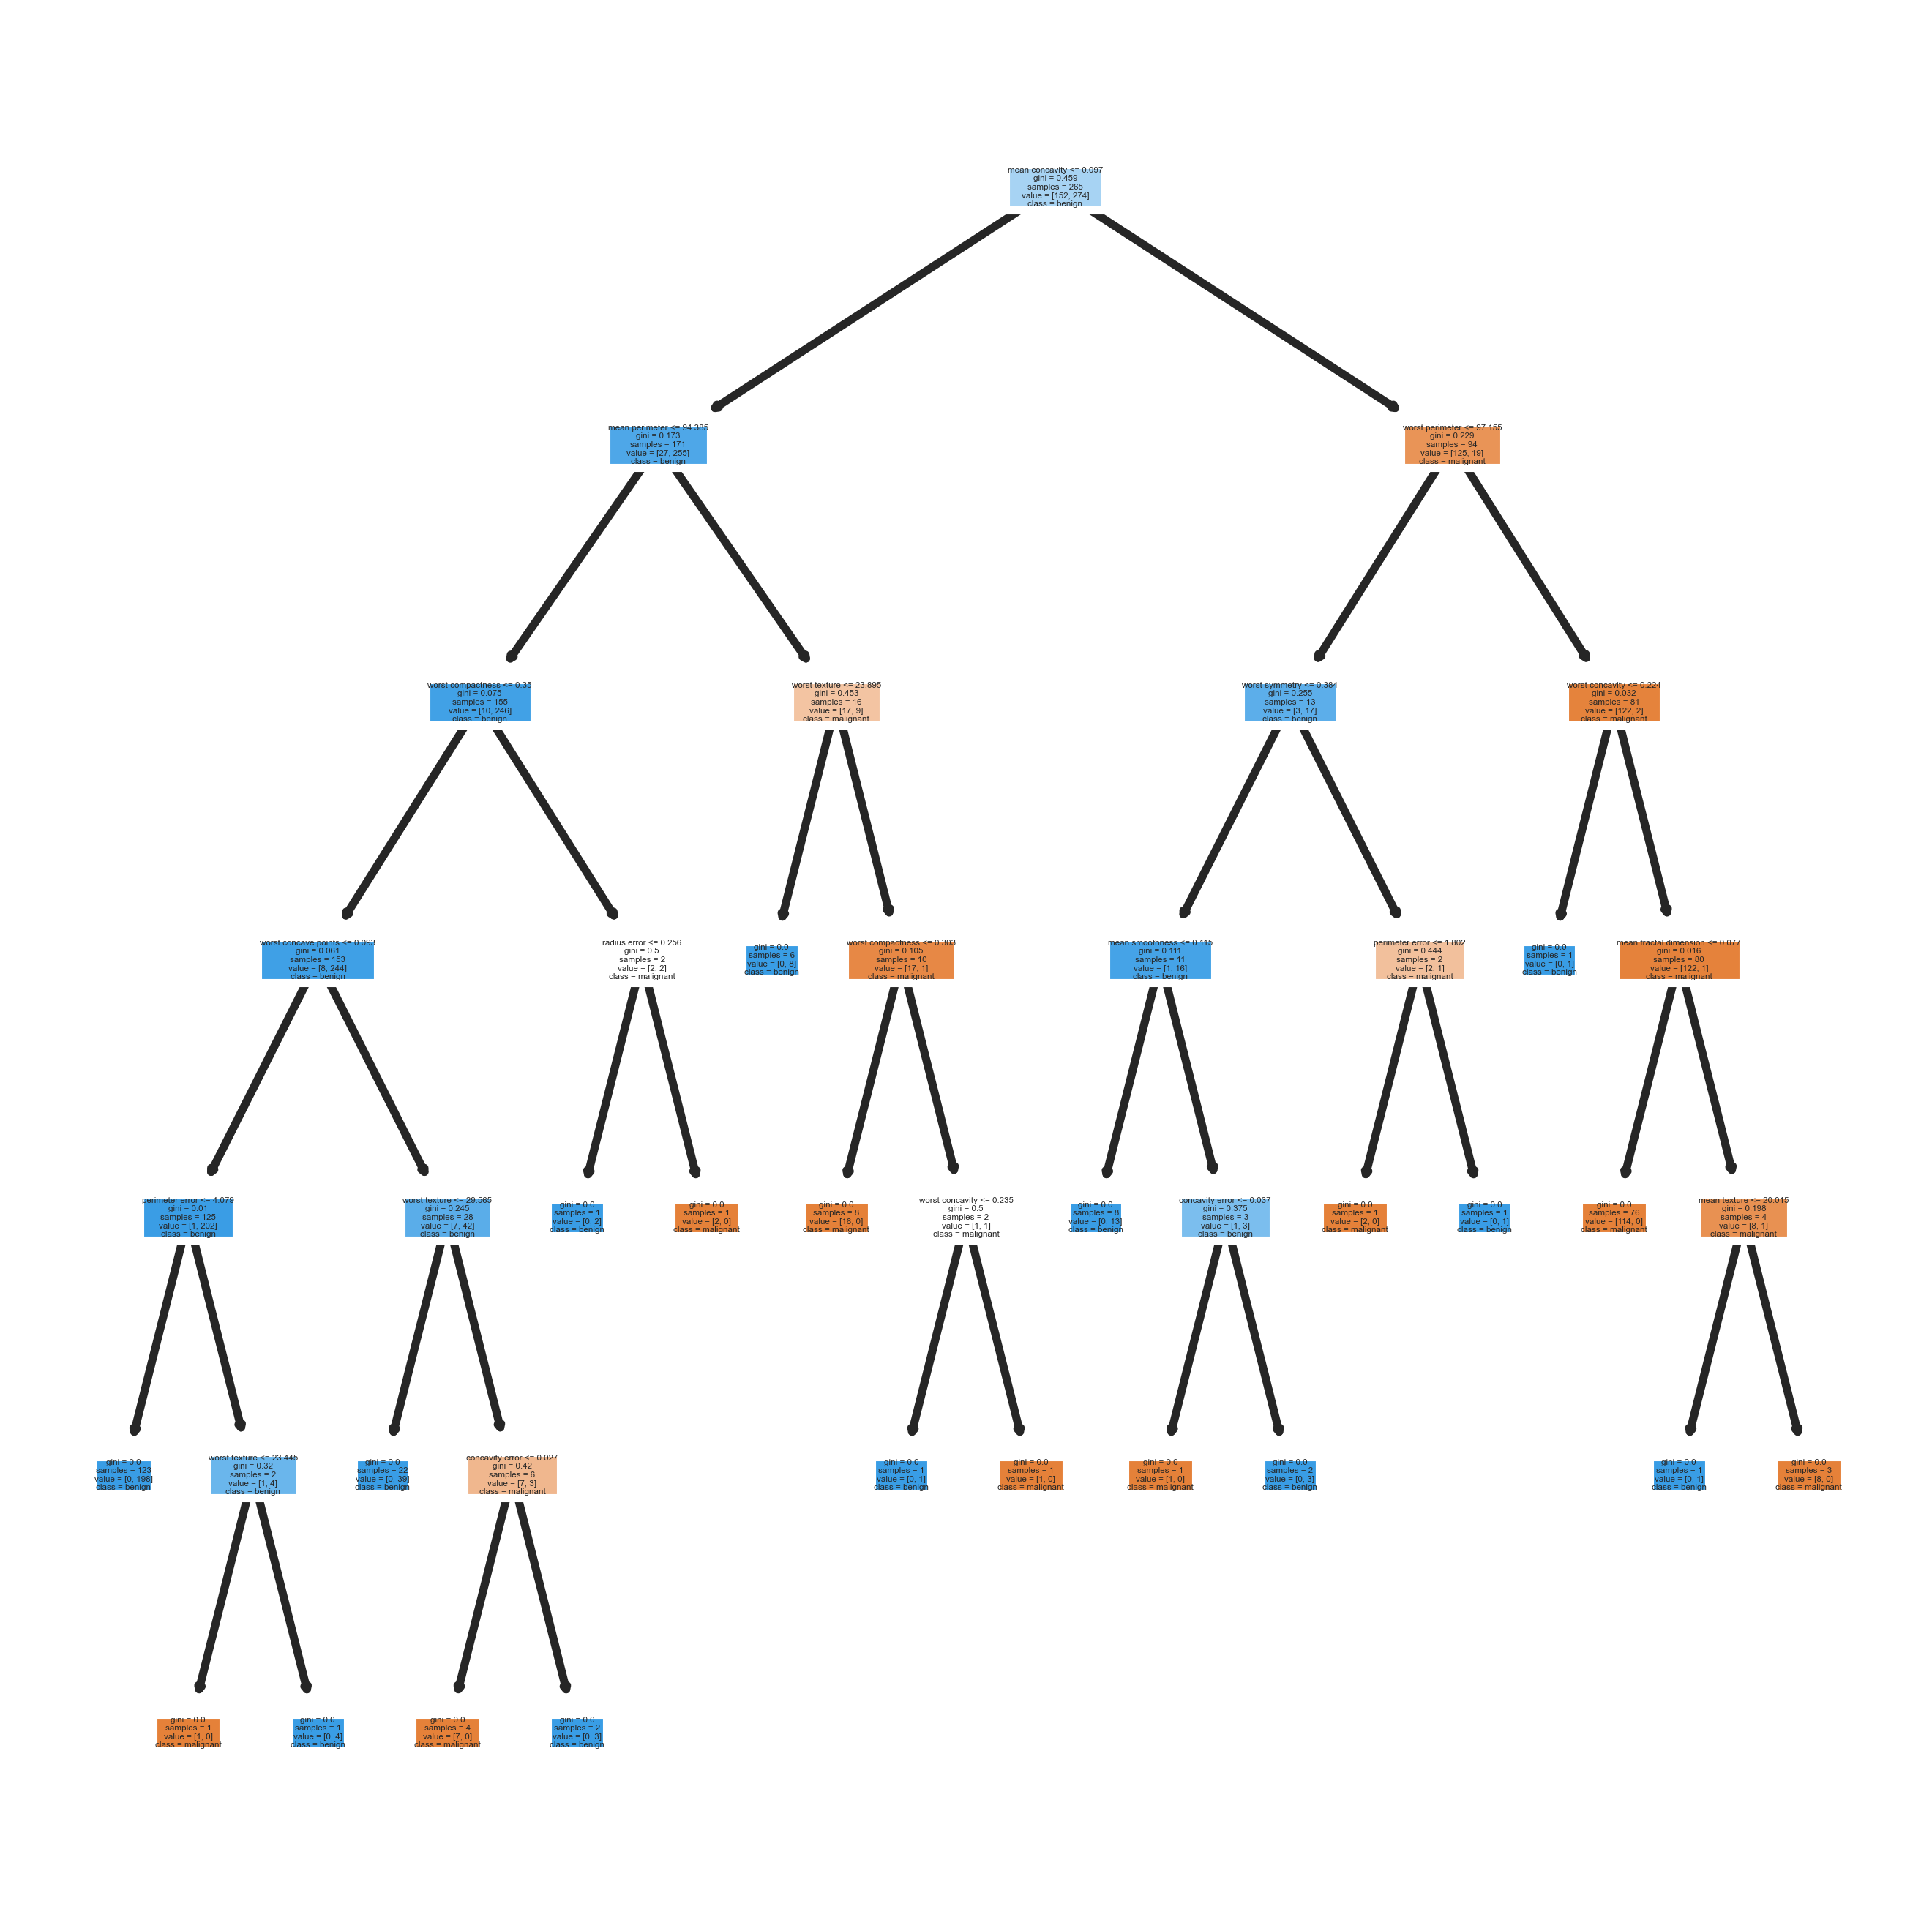

In [116]:

fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

random forest for feature selection

In [120]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [122]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 10)

model.fit(X_train,y_train)

importances = model.feature_importances_

final_df = pd.DataFrame({"Features"})

ValueError: Found input variables with inconsistent numbers of samples: [426, 102984]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.9979


In [ ]:
# instantiate the classifier with n_estimators = 1000

rfc_100 = RandomForestClassifier(n_estimators=1000, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9979


In [ ]:

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Destination Port        0.250484
Elapsed Time (sec)      0.186928
NAT Source Port         0.149762
NAT Destination Port    0.103697
Packets                 0.088822
Bytes                   0.058999
pkts_received           0.056658
Source Port             0.046456
Bytes Sent              0.029989
Bytes Received          0.026192
pkts_sent               0.002012
dtype: float64

Try robust-scaler

In [ ]:
train = pd.read_csv('/Users/nattasorn/Documents/dads_6003/Group_quiz 1/dads-6003-firewall-ml/data_source/train.csv')
test = pd.read_csv('/Users/nattasorn/Documents/dads_6003/Group_quiz 1/dads-6003-firewall-ml/data_source/test.csv')

In [ ]:
train.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,51374,445,0,0,drop,70,70,0,1,0,1,0
1,5688,44847,0,0,deny,62,62,0,1,0,1,0
2,53624,445,0,0,drop,66,66,0,1,0,1,0
3,42587,53,63043,53,allow,199,94,105,2,30,1,1
4,56746,445,0,0,drop,70,70,0,1,0,1,0


In [ ]:
train_robust = train.copy()
test_robust = test.copy()

x_train_robust = train_robust.loc[:,['Destination Port', 'NAT Source Port','Packets', 'Elapsed Time (sec)','Bytes Received']]
y_train_robust = train_robust.loc[:,'Action']
x_test_robust = test_robust.loc[:,['Destination Port', 'NAT Source Port','Packets', 'Elapsed Time (sec)','Bytes Received']]
y_test_robust = test_robust.loc[:,'Action']

,Destination Port,NAT Source Port,Packets,Elapsed Time (sec),Bytes Received
0,445,0,1,0,0
1,44847,0,1,0,0
2,445,0,1,0,0
3,53,63043,2,30,105
4,445,0,1,0,0


,Destination Port,NAT Source Port,Packets,Elapsed Time (sec),Bytes Received
count,45872.000000,45872.000000,4.587200e+04,45872.000000,4.587200e+04
mean,10622.955267,19299.731950,1.145479e+02,66.181527,7.831426e+04
std,18533.181942,21982.486501,6.054768e+03,305.052341,2.767178e+06
min,0.000000,0.000000,1.000000e+00,0.000000,0.000000e+00
25%,80.000000,0.000000,1.000000e+00,0.000000,0.000000e+00
50%,445.000000,8940.000000,2.000000e+00,15.000000,7.800000e+01
75%,15000.000000,38411.250000,6.000000e+00,30.000000,4.470000e+02
max,65535.000000,65535.000000,1.036116e+06,10824.000000,3.208818e+08
